# This notebook ostensibly figures out what the sun position looks like
also thank you monarch SunEarthTools https://www.sunearthtools.com/dp/tools/pos_sun.php#top

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import astropy.units as unit
import astropy.constants as const
import itertools
import plotly.express as px 
import pandas as pd
from scipy.optimize import curve_fit


from axion_functions import *


In [32]:
solar_df = pd.read_excel("..\\sun_path_v1.xlsx", header=3)
hour = solar_df["hour"]
alt = solar_df["Elevation"]
az = solar_df["Azimuth"]
alt_rad = alt*np.pi/180
az_rad = az*np.pi/180
solar_df

,hour,Elevation,Azimuth
0,08:41:24,-0.833,62.44
1,08:50:00,0.680,61.15
2,08:55:00,1.550,60.39
3,09:00:00,2.410,59.62
4,09:05:00,3.270,58.84
...,...,...,...
112,18:05:00,3.080,300.92
113,18:10:00,2.220,300.15
114,18:15:00,1.360,299.38
115,18:20:00,0.480,298.61


In [114]:
annual_df = pd.read_excel("..\\stawell_annual.xlsx")

Index(['coo: -37.0574_142.7761', 'E 00:00:00', 'A 00:00:00', 'E 00:10:00',
       'A 00:10:00', 'E 00:20:00', 'A 00:20:00', 'E 00:30:00', 'A 00:30:00',
       'E 00:40:00',
       ...
       'E 23:10:00', 'A 23:10:00', 'E 23:20:00', 'A 23:20:00', 'E 23:30:00',
       'A 23:30:00', 'E 23:40:00', 'A 23:40:00', 'E 23:50:00', 'A 23:50:00'],
      dtype='object', length=289)

In [216]:
dates = np.array(annual_df)[:,0]
alts  = np.array(annual_df)[:,1::2]
azs   = np.array(annual_df)[:,2::2]

In [217]:
new_dict = {"Date": dates,
            "Alt" : alts,
            "Az"  : azs}

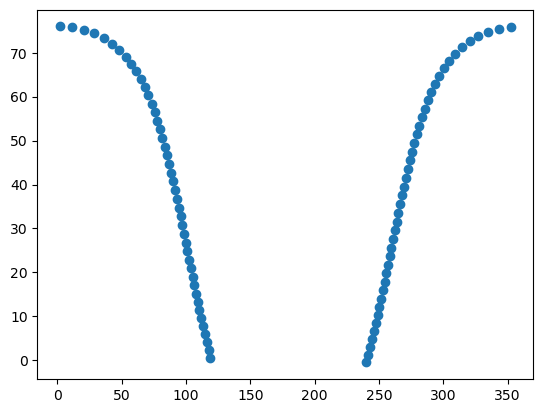

In [218]:
mask =     alts[0,:] != '--'
plt.scatter(azs[0,:][mask],
           alts[0,:][mask])

In [299]:
def cosine_fit(x, amp, phase, vert):
    return amp*np.cos(np.pi/180*(x-phase))+vert

def fit_curves():
    curves = []
    for day in range(len(dates)):
        mask = alts[day,:] != '--'
        param,cov = curve_fit(cosine_fit, azs[day,:][mask], alts[day,:][mask], p0=(130, 0, 0))
        curves.append(param)
    return np.array(curves)


In [300]:
fits = fit_curves()

In [301]:
fits

array([[54.06476699,  0.08984318, 35.22555939],
       [54.0493863 ,  0.08033367, 35.0967023 ],
       [54.03081756,  0.07263784, 34.95551034],
       ...,
       [54.09830001,  0.11008002, 35.46996277],
       [54.08239159,  0.10168397, 35.36920727],
       [54.06847224,  0.09259064, 35.25560298]])

In [302]:
fits_df = pd.DataFrame(fits,columns=["amp","phase","vert"])
fits_df

,amp,phase,vert
0,54.064767,0.089843,35.225559
1,54.049386,0.080334,35.096702
2,54.030818,0.072638,34.955510
3,54.013248,0.063627,34.803082
4,53.995439,0.055636,34.638692
...,...,...,...
361,54.447723,0.012377,35.506767
362,54.439279,0.001280,35.429900
363,54.098300,0.110080,35.469963
364,54.082392,0.101684,35.369207


In [303]:
np.array(fits_df["amp"])

array([54.06476699, 54.0493863 , 54.03081756, 54.01324797, 53.99543918,
       53.97690925, 53.95621617, 53.93478022, 53.91521116, 53.89200128,
       53.54351478, 53.52139954, 53.50147963, 53.48159034, 53.46134118,
       53.4417255 , 53.42643024, 53.07640719, 53.06295184, 53.04844777,
       52.69746525, 52.68584031, 52.67522615, 52.66809343, 52.66274307,
       52.65722406, 52.65564363, 52.65476354, 52.65716305, 52.32768802,
       52.33334073, 52.34192028, 52.35057415, 52.02622368, 52.04202652,
       52.0595488 , 52.07995637, 52.10442361, 51.79467826, 51.82008265,
       51.84892189, 51.88464331, 51.91874058, 51.6199464 , 51.65889815,
       51.70366883, 51.74689019, 51.45903256, 51.51013045, 51.5656739 ,
       51.6205837 , 51.33917969, 51.40235428, 51.4669469 , 51.53176994,
       51.60040324, 51.33691583, 51.41119164, 51.48879685, 51.22318611,
       51.30322662, 51.38724176, 51.47445637, 51.5654255 , 51.65405845,
       51.74721877, 51.50894799, 51.25613031, 51.35669222, 51.46

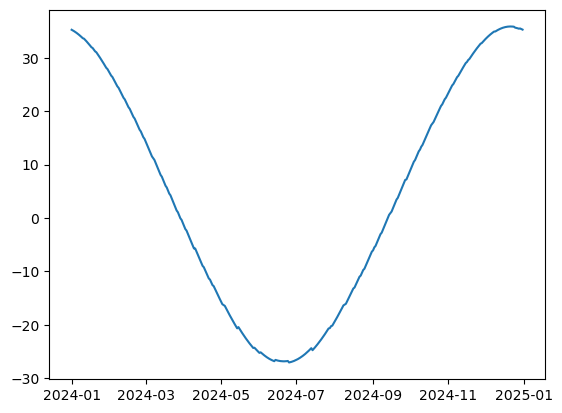

In [304]:
plt.plot(dates, np.array(fits_df["vert"]))

In [305]:
float(fits[1,2])

35.09670229549886

In [306]:
xaxis = np.arange(0, 360, 0.01)
yaxis = cosine_fit(xaxis, float(fits[101,0]), 
                          float(fits[101,1]), 
                          float(fits[101,2]))

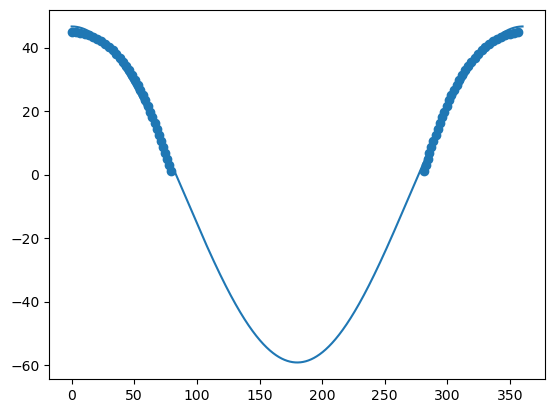

In [307]:
fig,ax = plt.subplots()
ax.plot(xaxis, yaxis)
mask =     alts[100,:] != '--'
ax.scatter( azs[100,:][mask],
           alts[100,:][mask])

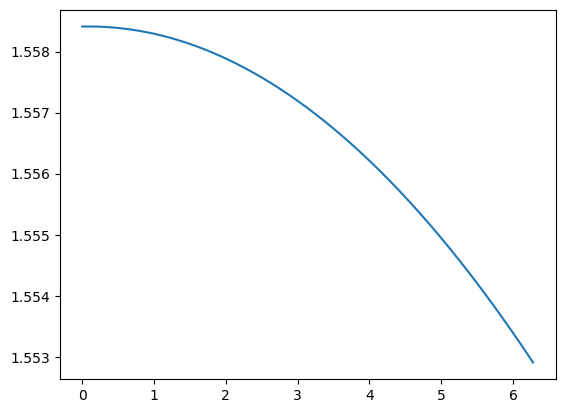

In [308]:
some_param = (54.06476699*np.pi/180,  0.08984318, 35.22555939*np.pi/180)
xaxis = np.arange(0, 2*np.pi, 0.01)
yaxis = cosine_fit(xaxis, *some_param)
plt.plot(xaxis, yaxis)

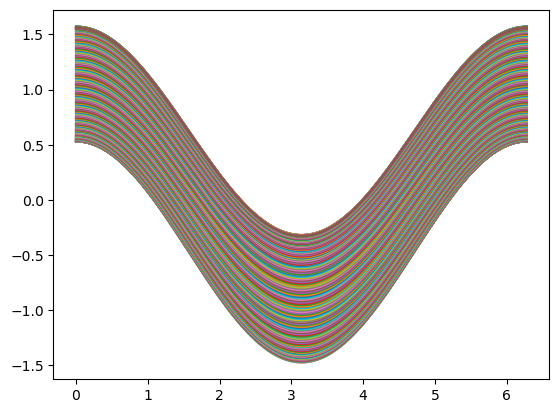

In [312]:
fig,ax = plt.subplots()

for triplet in fits:
    a = triplet[0]*np.pi/180
    p = triplet[1]*np.pi/180
    v = triplet[2]*np.pi/180
    ax.plot(xaxis, cosine_fit(180*xaxis/np.pi, a, p, v))

plt.show()

In [326]:
(np.array([dates]).transpose()).shape

(366, 1)

In [322]:
fits.shape

(366, 3)

In [332]:
full_array = np.hstack([(np.array([dates]).transpose()), fits*np.pi/180])

In [333]:
full_df = pd.DataFrame(full_array, columns=["Date", "a", "p", "v"])

In [334]:
full_df.to_csv("..\\cosine_fits.csv")

In [67]:
def unstack_angle(arr, rad = True):
    if rad:
        boundary = 2*np.pi
    else:
        boundary = 360
    output = []
    for elem in arr:
        if elem>boundary/2:
            output.append(elem-boundary)
        else:
            output.append(elem)
    return np.array(output)

us_az_rad = unstack_angle(az_rad)
us_alt_rad = unstack_angle(alt_rad)

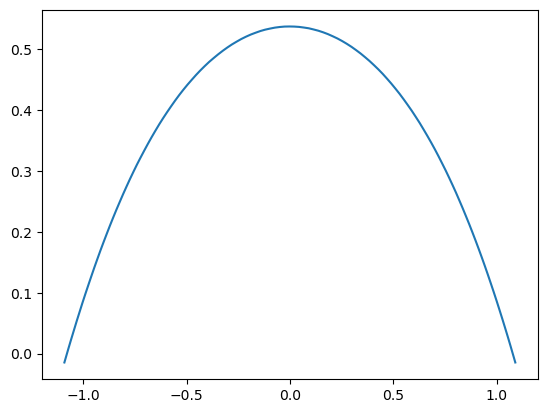

In [69]:
plt.plot(us_az_rad, us_alt_rad)

In [8]:
def cosine_fit(x, amp, phase, vert):
    return amp*np.cos(x-phase)+vert

def cosine_2fit(x, amp, vert):
    return amp*np.cos(x)+vert

In [11]:
param, cov = curve_fit(cosine_fit, us_az_rad, us_alt_rad)
print(param)
print(cov)

[ 9.94078999e-01 -3.90320878e-04 -4.40741946e-01]
[[ 5.30080970e-05 -8.31646164e-08 -4.14781966e-05]
 [-8.31646164e-08  4.26296219e-06  7.24196328e-08]
 [-4.14781966e-05  7.24196328e-08  3.39691930e-05]]


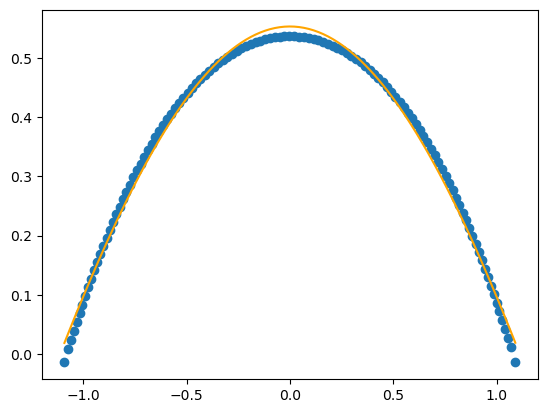

In [12]:
fig,ax = plt.subplots()
ax.scatter(us_az_rad, us_alt_rad)
ax.plot(us_az_rad, cosine_fit(us_az_rad, *param), color="orange")

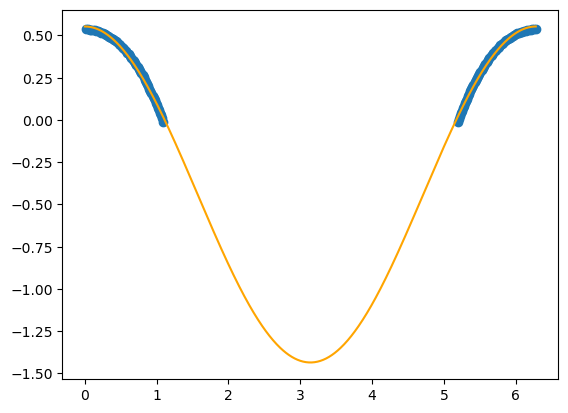

In [18]:
param2, cov2 = curve_fit(cosine_fit, az_rad, alt_rad)
fig,ax = plt.subplots()
ax.scatter(az_rad, alt_rad)
ax.plot(np.arange(0,2*np.pi,0.01), cosine_fit(np.arange(0,2*np.pi,0.01), *param2), c="orange")

#a*cos(x-p) + v

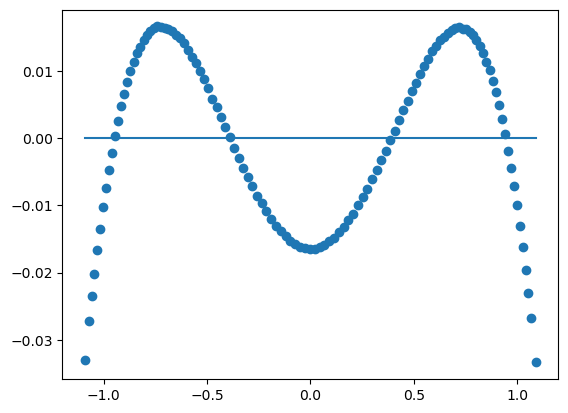

In [13]:
residuals = us_alt_rad - cosine_fit(us_az_rad, *param)
plt.scatter(us_az_rad, residuals)
plt.plot(us_az_rad, np.zeros(us_alt_rad.shape))

array([[54.06476699,  0.08984318, 35.22555939],
       [54.0493863 ,  0.08033367, 35.0967023 ],
       [54.03081756,  0.07263784, 34.95551034],
       ...,
       [54.09830001,  0.11008002, 35.46996277],
       [54.08239159,  0.10168397, 35.36920727],
       [54.06847224,  0.09259064, 35.25560298]])